In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use("/Users/tjwilli/presentation.mplstyle")

## Simple Diff Eqs
### Example: Reimann sum
### $\frac{dy}{dt} = f(t) =  4e^{-\frac{t}{2}}\sin^2{t}+t^\frac{1}{2}$

Text(0, 0.5, 'y')

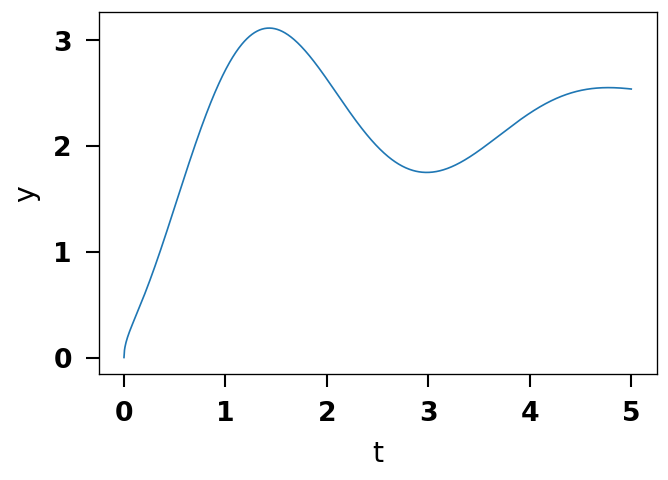

In [3]:
plt.figure(figsize=(6,4))
t = np.linspace(0,5,1000)
deriv_func = lambda t: 4*np.exp(-t/2) * np.sin(t)**2 + t**.5
dydt = deriv_func(t)
plt.plot(t,dydt)
plt.xlabel('t')
plt.ylabel('y')

Text(0.5, 1.0, 'dt=0.1,y(5.0)=10.78')

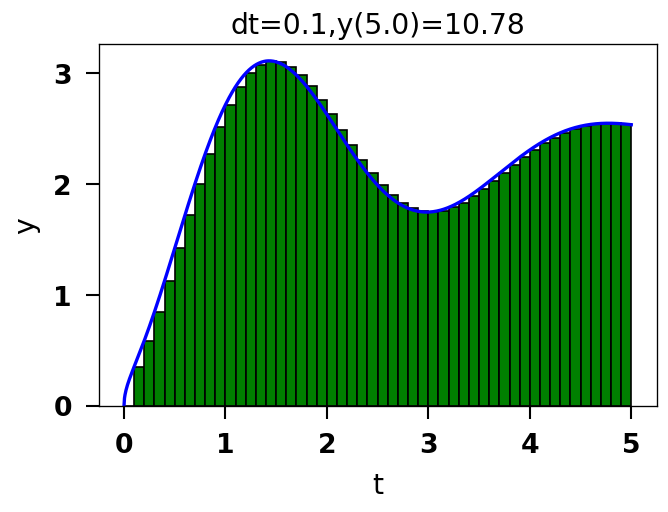

In [5]:
dt = .1
atot = 0

plt.figure(figsize=(6,4))

for tt in np.arange(0,t.max(),dt):
    h = deriv_func(tt)
    atot += h * dt
    plt.bar(
        tt,
        h,
        width=dt,
        color='green',
        edgecolor='k',
        align='edge'
    )
    

plt.plot(t,dydt,c='blue',lw=2)
plt.xlabel('t')
plt.ylabel('y')
plt.title("dt={},y({})={:.2f}".format(dt,t.max(),atot))

## Taylor approximation

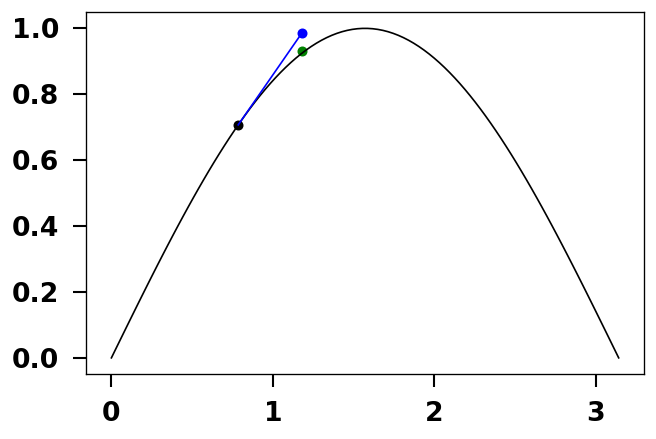

In [6]:
#Set up the figure for plotting
plt.figure(figsize=(6,4))

#Create array to plot over
t = np.linspace(0,np.pi,100)
y = np.sin(t)
#Plot actual function
plt.plot(t,y,c='k')

#Initial value
t0 = np.pi/4
y0 = np.sin( t0 )
#Plot initial value
plt.scatter([t0],[y0],c='k')
#Timestep
dt = np.pi/8

#First deriv
dydt0 = np.cos( t0 )
#Second deriv
d2ydt20 = -np.sin(t0)

#Linear approx
y1 = y0 + dydt0 * dt
#Plot linear approx
plt.scatter( [t0+dt],[y1],c='blue')
plt.plot( [t0,t0+dt],[y0,y1],c='blue')

#Second order approx
y1 = y0 + dydt0 * dt +0.5*d2ydt20*dt**2
plt.scatter( [t0+dt],[y1],c='green')

## Euler method

In [10]:
def deriv(tn,yn,tau):
    """Calculate the derivate"""
    return -yn / tau

#Tau used for derivative
tau = 3
#Time step
dt = 0.2

#Initial value
t0 = 0
y0 = 5

#The time value when we want to stop the loop
tstop = 10

nmax = int( (tstop - t0) / dt )
print("We will loop through {} points".format(nmax))

We will loop through 50 points


In [11]:
#Set up our lists to collect our approximation points as we loop
time = []
y = []

#In this case, we know the true solution (y = 5*exp(-t/T)) so let's collect it to to compare
yactual = []
time.append(t0)
y.append(y0)
yactual.append(y0)

for i in range(1,nmax):
    #t_n-1, y_n-1
    tprev = time[i-1]
    yprev = y[i-1]
    
    #Calculate derivative
    dydtprev = deriv(tprev,yprev,tau)
    
    yn = yprev + dydtprev * dt
    y.append( yn )
    time.append( tprev + dt )
    
    #True solution
    yactual.append( y0 * np.exp(-time[-1]/tau) )

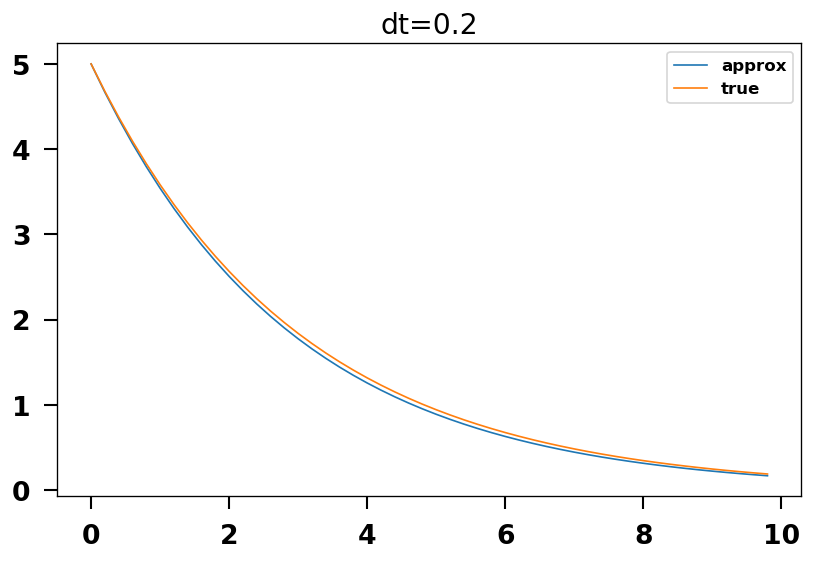

In [12]:
plt.plot(time,y,label='approx')
plt.plot(time,yactual,label='true')
plt.title("dt={}".format(dt))
plt.legend();

## Same thing in numpy

In [ ]:
def deriv(tn,yn,tau):
    """Calculate the derivate"""
    return -yn / tau

#Tau used for derivative
tau = 3
#Time step
dt = 0.5

#Initial value
t0 = 0
y0 = 5

#The time value when we want to stop the loop
tstop = 10

In [ ]:
time = np.arange(t0,tstop,dt)
y = np.zeros_like(time)
yactual = np.zeros_like(time)

time[0] = t0
y[0] = y0

for i in range(1,time.size):
    tprev = time[i-1]
    yprev = y[i-1]
    
    #Calculate derivative
    dydtprev = deriv(tprev,yprev,tau)
    yn = yprev + dydtprev * dt
    y[i] = yn

In [ ]:
plt.plot(time,y,label='approx')
plt.plot(time,y0*np.exp(-time/tau),label='actual')
plt.title("dt={}".format(dt))
plt.xlabel('t')
plt.ylabel('y')
plt.legend();

## Error

In [ ]:
def deriv(tn,yn,tau):
    """Calculate the derivate"""
    return -yn / tau

#Tau used for derivative
tau = 3
#Initial value
t0 = 0
y0 = 5

plt.figure(figsize=(6,4))
#The time value when we want to stop the loop
tstop = 10
for dt in np.logspace(-3,-0.3,5):
    time = np.arange(t0,tstop,dt)
    y = np.zeros_like(time)
    yactual = y0 * np.exp(-time/tau)
    yerr = np.zeros_like(y)

    time[0] = t0
    y[0] = y0

    for i in range(1,time.size):
        tprev = time[i-1]
        yprev = y[i-1]

        #Calculate derivative
        dydtprev = deriv(tprev,yprev,tau)
        yn = yprev + dydtprev * dt
        y[i] = yn
        yerr[i] = np.abs( yn - yactual[i] ) / yactual[i]
    plt.plot(time,yerr,label='dt={:.2E}'.format(dt))
plt.legend()
plt.ylabel('fractional error')
plt.xlabel('time')
plt.title(r'$E_n\sim\Delta t$')

## Roundoff errors

In [ ]:
def deriv(tn,yn,tau):
    """Calculate the derivate"""
    return -yn / tau

#Tau used for derivative
tau = 5700. #carbon half life
#Time step
dt = 600. # ~0.1 tau

#Initial value
t0 = 0
y0 = 5

#The time value when we want to stop the loop
tstop = tau * 5

In [ ]:
time = np.arange(t0,tstop,dt)
y = np.zeros_like(time)
yactual = np.zeros_like(time)

time[0] = t0
y[0] = y0

for i in range(1,time.size):
    tprev = time[i-1]
    yprev = y[i-1]
    
    #Calculate derivative
    dydtprev = deriv(tprev,yprev,tau)
    yn = yprev + dydtprev * dt
    y[i] = yn

In [ ]:
plt.plot(time,y)
plt.plot(time,y0*np.exp(-time/tau))

In [ ]:
tt = np.linspace(0,t.max(),1000)
fig = plt.figure(figsize=(6,4))

ax1 = plt.subplot(2,1,1)
line, = ax1.plot([], [], lw=3)
line1, = ax1.plot(tt,5*np.exp(-tt) )
sc = ax1.scatter( [],[] )
ax1.xaxis.set_visible(False)
ax1.set_ylim(-1,6)
ax1.set_ylabel("y")
#ax1.set_yscale('log')
ax2 = plt.subplot(2,1,2)
ax2.set_ylabel('relative error')
line2, = ax2.plot( [],[] )
ax1.set_xlim(0,5)
ax2.set_xlim(0,5)
ax2.set_ylim(0,1)
#ax2.set_yscale('log')
ax2.set_xlabel("t")
plt.tight_layout()

def init():
    line.set_data([], [])
    sc.set_offsets( np.array([[],[]]).T)
    return line,

def animate(i):
    sc.set_offsets( np.array([t[:i-1],x[:i-1]]).T )
    line.set_data( t[:i], x[:i] )
    err = 5 * np.exp(-t[:i]) - x[:i]
    rel = err / x[:i]
    line2.set_data( t[:i], rel)
    if rel.size and rel.max() > max(ax2.get_ylim()):
        ax2.set_ylim( 1e-2,rel.max() )
    return line,

In [ ]:
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=5/t.size * 1000, blit=True)
HTML( anim.to_html5_video() )

In [ ]:
h = np.logspace(-10,-1,100)
err = np.finfo(np.float).eps / h + h

In [ ]:
plt.loglog(h,err)

In [ ]:
.2**2